# Attribution and Motifs Detection with Decima

In [45]:
%matplotlib inline

This documentation demonstrates how to use Decima's attribution analysis capabilities to identify important regulatory regions in genomic sequences and discover transcription factor binding motifs within those regions. Attribution analysis helps reveal which parts of the DNA sequence most strongly influence gene expression predictions, while **motif scanning** can identify specific transcription factor binding sites in these regions of interest.

### Simple Python API

In [21]:
# TODO: implement the simple api function based on the advance api
# from decima.interpret import predict_save_attribution_motifs

spi1_cell_types = [
    'classical monocyte', 
    'intermediate monocyte',
    'non-classical monocyte', 
    'alveolar macrophage', 
    'macrophage'
]

# predict_save_attribution_motifs(
#     gene='SP1I',
#     cells=f'cell_type in {spi1_cell_types}', # Choice cell types. See advance api for more sophisticated queries.
#     # constract_cells=f'cell_type not in {spi1_cell_types} and tissue == "blood"' # Optional argument to improve cell specificity of calls
#     output_dir='attrs_SP1I_monoctypes'
# )

This comments creates following files in the directory:

        |- qc.log : QC warnings check if the predictions are relable for the peak
        |- peaks.bed : list of attribution peaks 
        |- peaks.png : plot of peak locations
        |- motifs.tsv : motifs detected in the peaks
        |- attributions_scores.tsv : attiribution score matrix for the seq
        |- attributions.bigwig : bigwig file for attributinos scores
        |- attributions : plots for attribution scores
                |- {attribution}.png

You can simply load `peaks.bed` and  `attributions.bigwig` to IGV and investigate important elements.


### Simple CLI API

Same operations can be also performed with the CLI. 

In [22]:
# TODO: implement the simple cli function based on the simple api

# ! decima attribution --gene "SP1I" --cells "cell_type == 'classical monocyte'" --output_dir cli_attrs_SP1I_classical_monoctypes/

See further details of attributions with:

In [23]:
# ! decima attribution --help

### Advance API

In [24]:
# TODO: automaticly load from wandb and cache

matrix_file='Supplementary_file_1.h5ad'
model_file = 'rep0.ckpt'

In [ ]:
# !wget https://zenodo.org/records/15092691/files/rep0.ckpt # Model replicate 0 - change the number to get replicates 1-3
# !wget https://zenodo.org/records/15092691/files/Supplementary_file_1.h5ad # Metadata and predictions

In [ ]:
import torch
from decima.result import DecimaResult

# TODO allow loading defaults from the cache directory.

result = DecimaResult.load('Supplementary_file_1.h5ad')

device = 0 if torch.cuda.is_available() else 'cpu'
print(device)
result.load_model(model_file, device=device)

wandb: Downloading large artifact human_state_dict_fold0:latest, 709.30MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.6 (1100.7MB/s)


DecimaResult(anndata=AnnData object with n_obs × n_vars = 8856 × 18457
    obs: 'cell_type', 'tissue', 'organ', 'disease', 'study', 'dataset', 'region', 'subregion', 'celltype_coarse', 'n_cells', 'total_counts', 'n_genes', 'size_factor', 'train_pearson', 'val_pearson', 'test_pearson'
    var: 'chrom', 'start', 'end', 'strand', 'gene_type', 'frac_nan', 'mean_counts', 'n_tracks', 'gene_start', 'gene_end', 'gene_length', 'gene_mask_start', 'gene_mask_end', 'frac_N', 'fold', 'dataset', 'gene_id', 'pearson', 'size_factor_pearson'
    uns: 'log1p'
    layers: 'preds')

In [26]:
result

DecimaResult(anndata=AnnData object with n_obs × n_vars = 8856 × 18457
    obs: 'cell_type', 'tissue', 'organ', 'disease', 'study', 'dataset', 'region', 'subregion', 'celltype_coarse', 'n_cells', 'total_counts', 'n_genes', 'size_factor', 'train_pearson', 'val_pearson', 'test_pearson'
    var: 'chrom', 'start', 'end', 'strand', 'gene_type', 'frac_nan', 'mean_counts', 'n_tracks', 'gene_start', 'gene_end', 'gene_length', 'gene_mask_start', 'gene_mask_end', 'frac_N', 'fold', 'dataset', 'gene_id', 'pearson', 'size_factor_pearson'
    uns: 'log1p'
    layers: 'preds')

The results and metadata stored in anndata format which you can access directly if needed but most operation are supported by DecimaResult object.

In [27]:
result.anndata

AnnData object with n_obs × n_vars = 8856 × 18457
    obs: 'cell_type', 'tissue', 'organ', 'disease', 'study', 'dataset', 'region', 'subregion', 'celltype_coarse', 'n_cells', 'total_counts', 'n_genes', 'size_factor', 'train_pearson', 'val_pearson', 'test_pearson'
    var: 'chrom', 'start', 'end', 'strand', 'gene_type', 'frac_nan', 'mean_counts', 'n_tracks', 'gene_start', 'gene_end', 'gene_length', 'gene_mask_start', 'gene_mask_end', 'frac_N', 'fold', 'dataset', 'gene_id', 'pearson', 'size_factor_pearson'
    uns: 'log1p'
    layers: 'preds'

These are the cell metadata contained in the Decima object.

In [28]:
result.cell_metadata

,cell_type,tissue,organ,disease,study,dataset,region,subregion,celltype_coarse,n_cells,total_counts,n_genes,size_factor,train_pearson,val_pearson,test_pearson
agg_0,Amygdala excitatory,Amygdala_Amygdala,CNS,healthy,jhpce#tran2021,brain_atlas,Amygdala,Amygdala,NaN,331,1.592883e+07,17000,41431.465186,0.942474,0.841879,0.865579
agg_1,Amygdala excitatory,Amygdala_Basolateral nuclear group (BLN) - lat...,CNS,healthy,SCR_016152,brain_atlas,Amygdala,Basolateral nuclear group (BLN) - lateral nucl...,NaN,11369,2.952133e+08,18080,40765.341481,0.943247,0.839565,0.860787
agg_2,Amygdala excitatory,Amygdala_Bed nucleus of stria terminalis and n...,CNS,healthy,SCR_016152,brain_atlas,Amygdala,Bed nucleus of stria terminalis and nearby - BNST,NaN,139,2.593231e+06,15418,42556.387020,0.952271,0.855175,0.866643
agg_3,Amygdala excitatory,Amygdala_Central nuclear group - CEN,CNS,healthy,SCR_016152,brain_atlas,Amygdala,Central nuclear group - CEN,NaN,3892,9.946371e+07,17959,42884.641430,0.959857,0.863817,0.881534
agg_4,Amygdala excitatory,Amygdala_Corticomedial nuclear group (CMN) - a...,CNS,healthy,SCR_016152,brain_atlas,Amygdala,Corticomedial nuclear group (CMN) - anterior c...,NaN,2945,1.281619e+08,17885,41816.741933,0.951541,0.855172,0.868277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
agg_9533,vascular associated smooth muscle cell,upper lobe of right lung,lung,NA,ENCODE,scimilarity,nan,nan,NaN,21,3.483375e+04,8515,35404.911768,0.736001,0.664692,0.655120
agg_9535,vascular associated smooth muscle cell,urinary bladder,urinary,healthy,GSE129845,scimilarity,nan,nan,NaN,24,8.498500e+04,7337,26189.415789,0.810245,0.690370,0.656580
agg_9536,vascular associated smooth muscle cell,uterus,uterus,NA,ENCODE,scimilarity,nan,nan,NaN,272,5.700762e+05,14769,44938.403867,0.915162,0.807299,0.841429
agg_9537,vascular associated smooth muscle cell,uterus,uterus,healthy,e5f58829-1a66-40b5-a624-9046778e74f5,scimilarity,nan,nan,NaN,472,1.089170e+07,14514,30145.422152,0.852446,0.717448,0.729172


Similarly, these are the gene metadata contained in the Decima object.

In [29]:
result.gene_metadata

,chrom,start,end,strand,gene_type,frac_nan,mean_counts,n_tracks,gene_start,gene_end,gene_length,gene_mask_start,gene_mask_end,frac_N,fold,dataset,gene_id,pearson,size_factor_pearson
STRADA,chr17,63381538,63905826,-,protein_coding,0.000000,2.208074,7616,63682336,63741986,59650,163840,223490,0.000000,['fold1'],train,ENSG00000266173,0.492455,0.476627
ETV4,chr17,43219172,43743460,-,protein_coding,0.030873,0.925863,5004,43527844,43579620,51776,163840,215616,0.000000,['fold1'],train,ENSG00000175832,0.737548,0.613281
USP25,chr21,15566185,16090473,+,protein_coding,0.000000,3.650355,8604,15730025,15880069,150044,163840,313884,0.000000,['fold6'],train,ENSG00000155313,0.905298,0.784446
ZSWIM5,chr1,44945761,45470049,-,protein_coding,0.000620,2.190115,6123,45016399,45306209,289810,163840,453650,0.000000,['fold5'],train,ENSG00000162415,0.961775,0.795131
C21orf58,chr21,45963427,46487715,-,protein_coding,0.000791,1.650467,7354,46300181,46323875,23694,163840,187534,0.000000,['fold6'],train,ENSG00000160298,0.645260,0.412368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NPDC1,chr9,136685731,137210019,-,protein_coding,0.000000,2.625285,7852,137039463,137046179,6716,163840,170556,0.000000,['fold3'],test,ENSG00000107281,0.328081,0.178204
ZNF425,chr7,148765876,149290164,-,protein_coding,0.001048,1.292957,6511,149102784,149126324,23540,163840,187380,0.000000,['fold7'],train,ENSG00000204947,0.818260,0.737081
COL5A1,chr9,134477934,135002222,+,protein_coding,0.002159,1.492664,6209,134641774,134844843,203069,163840,366909,0.000000,['fold3'],test,ENSG00000130635,0.766627,0.456999
BRD3,chr9,133708087,134232375,-,protein_coding,0.000000,3.190450,8675,134030305,134068535,38230,163840,202070,0.004662,['fold3'],test,ENSG00000169925,0.345257,0.280283


You can also access the genes and cells:

In [30]:
result.genes

Index(['STRADA', 'ETV4', 'USP25', 'ZSWIM5', 'C21orf58', 'MIR497HG', 'CFAP74',
       'GSE1', 'LPP', 'CLK1',
       ...
       'STRIP2', 'TNFRSF1A', 'RBM14-RBM4', 'C1orf21', 'LINC00639', 'NPDC1',
       'ZNF425', 'COL5A1', 'BRD3', 'EVI5L'],
      dtype='object', length=18457)

In [31]:
result.cells

Index(['agg_0', 'agg_1', 'agg_2', 'agg_3', 'agg_4', 'agg_5', 'agg_6', 'agg_7',
       'agg_8', 'agg_9',
       ...
       'agg_9528', 'agg_9529', 'agg_9530', 'agg_9531', 'agg_9532', 'agg_9533',
       'agg_9535', 'agg_9536', 'agg_9537', 'agg_9538'],
      dtype='object', length=8856)

In [32]:
result.predicted_expression_matrix(genes=['SPI1'])

,SPI1
agg_0,0.235185
agg_1,0.206469
agg_2,0.152874
agg_3,0.206552
agg_4,0.208177
...,...
agg_9533,0.473107
agg_9535,0.268442
agg_9536,0.336398
agg_9537,0.137872


In [33]:
result.predicted_expression_matrix()

,STRADA,ETV4,USP25,ZSWIM5,C21orf58,MIR497HG,CFAP74,GSE1,LPP,CLK1,...,STRIP2,TNFRSF1A,RBM14-RBM4,C1orf21,LINC00639,NPDC1,ZNF425,COL5A1,BRD3,EVI5L
agg_0,3.001925,1.762730,4.592772,5.099946,1.774805,0.356839,2.723968,4.739502,4.878714,3.327033,...,2.920594,0.297011,1.813074,4.493094,1.586075,3.319982,2.364579,2.374891,2.890716,3.253235
agg_1,3.003353,1.782654,4.723227,5.510479,1.666820,0.352753,2.425501,4.544352,4.855130,3.192972,...,3.227516,0.242533,1.818673,4.679863,1.348369,3.632192,2.463864,2.054537,2.700207,3.452777
agg_2,2.978871,2.089668,4.865537,5.617505,1.773259,0.380907,2.543027,4.512998,4.782970,3.390886,...,3.180318,0.263283,1.930930,4.540818,1.299774,4.154801,2.433835,2.297276,2.890761,3.629054
agg_3,3.074754,2.038535,4.884157,5.273578,1.760010,0.463595,2.543533,4.039080,4.854626,3.411034,...,2.939788,0.290311,1.847241,4.780760,1.529227,3.828480,2.331008,2.121762,2.608462,3.186322
agg_4,3.103840,1.959215,4.590865,5.256962,1.755244,0.382228,2.587021,4.453868,4.932796,3.250587,...,3.205086,0.258538,1.966316,4.641990,1.326930,3.780137,2.444831,2.255797,2.889546,3.451440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
agg_9533,2.289689,0.581705,4.639077,2.793091,0.751956,0.692147,0.568351,4.420611,6.842777,3.695646,...,0.549443,2.270267,1.523273,4.432419,0.614325,1.389469,1.054450,3.759573,2.514814,1.981362
agg_9535,0.833283,0.326443,1.960863,0.307475,0.337182,0.834267,0.110843,1.929069,3.701684,4.467318,...,0.178374,1.370960,1.084590,3.587358,0.068649,1.980652,0.240619,1.448074,1.673506,1.171897
agg_9536,3.036649,1.131592,4.749751,3.931905,1.401179,1.638554,1.078200,4.855861,6.520594,4.127848,...,1.195112,1.870594,2.443540,5.207511,1.023207,1.918750,2.230703,4.244238,2.968915,2.759851
agg_9537,1.264902,0.410833,2.903708,0.571702,0.486362,1.175724,0.165795,2.461262,4.814781,4.913913,...,0.373774,1.361205,1.722287,4.142306,0.095901,1.665432,0.493823,2.066999,2.361383,1.569963


Takes around ~10 seconds on GPU and ~5 minutes to call attributions on CPU. 

In [34]:
attributions = result.attributions(
    gene='SPI1',
    cells=f'cell_type in {spi1_cell_types}',
    constract_cells=f'organ == "blood" and cell_type not in {spi1_cell_types}',
)

Making inputs for SPI1
One-hot encoding sequence
Making gene mask


/Users/celikm5/miniforge3/envs/decima/lib/python3.13/site-packages/captum/_utils/gradient.py:57: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.


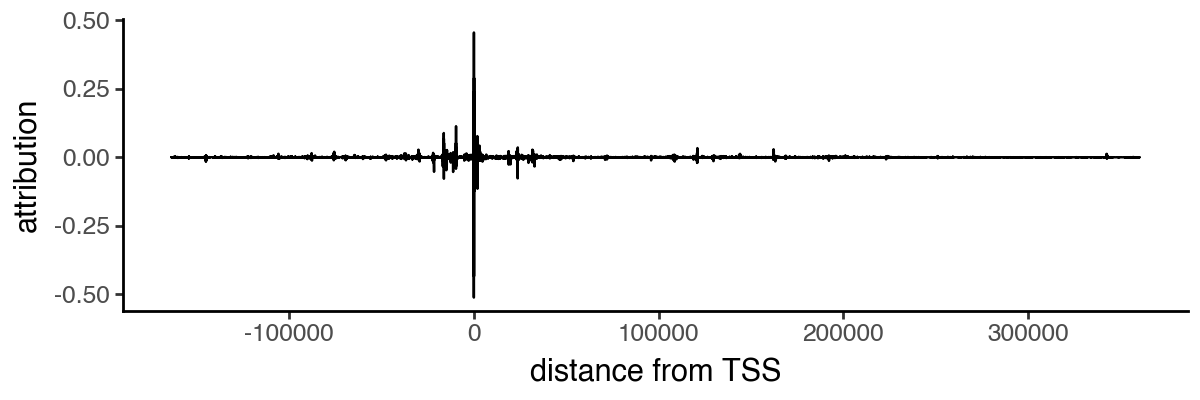

In [35]:
attributions.plot_peaks()

In [36]:
attributions.attrs.shape

(4, 524288)

In [41]:
attributions.tss_pos

163840

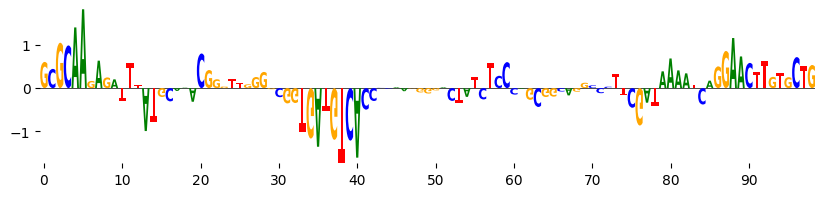

In [ ]:
attributions._plot_attributions(relative_loc=0, window=50)

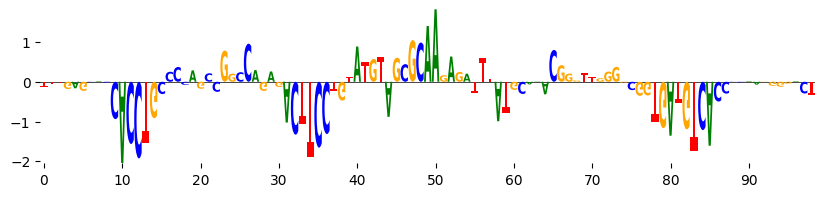

In [55]:
attributions.plot_attributions(relative_loc=-45)

This comment takes around ~3 minutes. 

In [56]:
attributions.scan_motifs()

/Users/celikm5/miniforge3/envs/decima/lib/python3.13/site-packages/tangermeme/tools/fimo.py:406: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
/Users/celikm5/miniforge3/envs/decima/lib/python3.13/site-packages/tangermeme/tools/fimo.py:406: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
/Users/celikm5/miniforge3/envs/decima/lib/python3.13/site-packages/tangermeme/tools/fimo.py:406: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, t

,motif,sequence,seq_idx,start,end,strand,score,p-value,matched_seq,site_attr_score,motif_attr_score,peak,height,from_tss
0,CEBPA.H12CORE.0.P.B,0,0,0,12,+,7.964049,0.000345,TGTAGCGCAAGA,0.165148,0.576084,163795,1.823407,-45
1,CEBPB.H12CORE.1.SM.B,0,0,0,13,+,4.519608,0.000355,TGTAGCGCAAGAG,0.157190,0.547104,163795,1.823407,-45
2,CEBPD.H12CORE.1.SM.B,0,0,0,13,-,6.831978,0.000445,TGTAGCGCAAGAG,0.157190,0.529464,163795,1.823407,-45
3,CEBPG.H12CORE.1.SM.B,0,0,0,12,-,7.931759,0.000198,TGTAGCGCAAGA,0.165148,0.588047,163795,1.823407,-45
4,KAISO.H12CORE.0.P.B,0,0,2,13,+,8.282666,0.000324,TAGCGCAAGAG,0.161420,0.442328,163795,1.823407,-45
5,EHF.H12CORE.0.P.B,1,1,1,16,+,9.409240,0.000136,AAATCAGGAACTTGT,0.112346,0.293474,163878,1.158463,38
6,ELF1.H12CORE.0.PSM.A,1,1,2,15,+,8.124340,0.000287,AATCAGGAACTTG,0.109924,0.292413,163878,1.158463,38
7,ELF3.H12CORE.0.S.B,1,1,2,15,+,6.618979,0.000462,AATCAGGAACTTG,0.109924,0.304211,163878,1.158463,38
8,ELF3.H12CORE.1.PM.A,1,1,2,15,+,5.230852,0.000330,AATCAGGAACTTG,0.109924,0.311345,163878,1.158463,38
9,ELF4.H12CORE.1.M.B,1,1,0,15,+,6.834103,0.000242,AAAATCAGGAACTTG,0.113154,0.280566,163878,1.158463,38


### Writing Advance queries

In [57]:
cells = result.query_cells(query='cell_type == "classical monocyte"')

In [63]:
cells = result.query_cells('cell_type == "classical monocyte" and disease == "healthy" and tissue == "blood"')

In [59]:
cells = result.query_cells('cell_type.str.contains("monocyte") and disease == "healthy"')

In [62]:
df_cell_metadata = result.cell_metadata

cells = df_cell_metadata[
    df_cell_metadata['cell_type'].str.contains('monocyte') & 
    (df_cell_metadata['disease'] == 'healthy')
].index